<a href="https://colab.research.google.com/github/LeonardoClemente23/ENEM-2018/blob/main/Combinando_dois_conj_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Combinando dois conjuntos de dados**

Nesse Notebook foi implementado a combinação de dois dataframes de origens diferentes. O primeiro são os dados do ENEM 2018, retirado do site do INEP, e o segundo são os IDHs dos munícipios brasileiros retirado do site [atlasbrasil.org.br](http://www.atlasbrasil.org.br)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Abrindo os arquivos
atlas = pd.read_excel('drive/My Drive/Colab Notebooks/Datasets/ENEM/atlas_IDHM.xlsx',
                  'Pasta1_CSV')

enem_dados = pd.read_csv('drive/My Drive/Colab Notebooks/Datasets/ENEM/fracao_municipio_MICRODADOS_ENEM_2018.csv')

In [ ]:
atlas.columns.values

array(['ANO', 'UF', 'Codmun6', 'Codmun7', 'Município', 'ESPVIDA',
       'FECTOT', 'MORT1', 'MORT5', 'RAZDEP', 'SOBRE40', 'SOBRE60',
       'T_ENV', 'E_ANOSESTUDO', 'T_ANALF11A14', 'T_ANALF15A17',
       'T_ANALF15M', 'T_ANALF18A24', 'T_ANALF18M', 'T_ANALF25A29',
       'T_ANALF25M', 'T_ATRASO_0_BASICO', 'T_ATRASO_0_FUND',
       'T_ATRASO_0_MED', 'T_ATRASO_1_BASICO', 'T_ATRASO_1_FUND',
       'T_ATRASO_1_MED', 'T_ATRASO_2_BASICO', 'T_ATRASO_2_FUND',
       'T_ATRASO_2_MED', 'T_FBBAS', 'T_FBFUND', 'T_FBMED', 'T_FBPRE',
       'T_FBSUPER', 'T_FLBAS', 'T_FLFUND', 'T_FLMED', 'T_FLPRE',
       'T_FLSUPER', 'T_FREQ0A3', 'T_FREQ11A14', 'T_FREQ15A17',
       'T_FREQ18A24', 'T_FREQ25A29', 'T_FREQ4A5', 'T_FREQ4A6',
       'T_FREQ5A6', 'T_FREQ6', 'T_FREQ6A14', 'T_FREQ6A17',
       'T_FREQFUND1517', 'T_FREQFUND1824', 'T_FREQFUND45',
       'T_FREQMED1824', 'T_FREQMED614', 'T_FREQSUPER1517', 'T_FUND11A13',
       'T_FUND12A14', 'T_FUND15A17', 'T_FUND16A18', 'T_FUND18A24',
       'T_FUND18M', 'T_FU

In [ ]:
# Selecionando as colunas que interessam do atlas
colunas_selecionadas_atlas = ['ANO', 'UF', 'Codmun6', 'Codmun7','Município',
                              'IDHM', 'IDHM_E', 'IDHM_L', 'IDHM_R']

atlas_IDHM = atlas[colunas_selecionadas_atlas]
atlas_IDHM

,ANO,UF,Codmun6,Codmun7,Município,IDHM,IDHM_E,IDHM_L,IDHM_R
0,2010,11,110001,1100015,ALTA FLORESTA D'OESTE,0.641,0.526,0.763,0.657
1,2010,11,110002,1100023,ARIQUEMES,0.702,0.600,0.806,0.716
2,2010,11,110003,1100031,CABIXI,0.650,0.559,0.757,0.650
3,2010,11,110004,1100049,CACOAL,0.718,0.620,0.821,0.727
4,2010,11,110005,1100056,CEREJEIRAS,0.692,0.602,0.799,0.688
...,...,...,...,...,...,...,...,...,...
5560,2010,52,522200,5222005,VIANÓPOLIS,0.712,0.622,0.818,0.710
5561,2010,52,522205,5222054,VICENTINÓPOLIS,0.684,0.562,0.804,0.707
5562,2010,52,522220,5222203,VILA BOA,0.647,0.534,0.818,0.619
5563,2010,52,522230,5222302,VILA PROPÍCIO,0.634,0.505,0.802,0.629


In [ ]:
enem_dados.columns.values

array(['CO_MUNICIPIO_RESIDENCIA', 'NO_MUNICIPIO_RESIDENCIA',
       'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'], dtype=object)

In [ ]:
# Selecionando as colunas que interesssam dos dados do ENEM
colunas_selecionadas_enem_dados = ['CO_MUNICIPIO_RESIDENCIA', 'NO_MUNICIPIO_RESIDENCIA',
                                   'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA','NU_NOTA_CN',
                                   'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']

enem_dados_municipios = enem_dados[colunas_selecionadas_enem_dados].dropna()

In [ ]:
media_enem_por_municipio = enem_dados_municipios.groupby(['CO_MUNICIPIO_RESIDENCIA', 'NO_MUNICIPIO_RESIDENCIA',
                                   'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA'],as_index=False).mean()
media_enem_por_municipio

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,1100015,Alta Floresta D'Oeste,11,RO,480.653117,557.422764,505.435772,519.142005,466.070461
1,1100023,Ariquemes,11,RO,476.208487,553.069189,510.740719,508.155184,458.494983
2,1100031,Cabixi,11,RO,468.973846,551.687692,499.123077,505.800000,446.769231
3,1100049,Cacoal,11,RO,484.515560,562.594958,521.349003,522.345520,478.411317
4,1100056,Cerejeiras,11,RO,477.077656,557.301832,513.361172,507.730037,464.395604
...,...,...,...,...,...,...,...,...,...
5565,5222005,Vianópolis,52,GO,493.409052,556.501724,518.795690,525.894397,486.982759
5566,5222054,Vicentinópolis,52,GO,469.161429,532.044286,491.771429,506.642857,450.000000
5567,5222203,Vila Boa,52,GO,459.281250,524.828125,474.696875,494.637500,377.500000
5568,5222302,Vila Propício,52,GO,455.734694,515.670408,473.967347,476.962245,402.244898


### **Depois de selecionado os dados necessários do dois Data Frames, agora juntaremos esses dois em um dataframe apenas, usando o método:**

```
pd.merge()
```








In [ ]:
dados_enem_IDHM = pd.merge(media_enem_por_municipio, atlas_IDHM, how='left',
                           left_on=['CO_MUNICIPIO_RESIDENCIA'], right_on=['Codmun7']).round(3)
dados_enem_IDHM_szero = dados_enem_IDHM.query('NU_NOTA_MT > 0 & NU_NOTA_CN > 0 & NU_NOTA_CH > 0 & NU_NOTA_LC > 0 & NU_NOTA_REDACAO > 0')

### **Agora iremos verificar se o IDH tem alguma relação com a média da nota do município:**

In [ ]:
dados_enem_IDHM.dtypes

CO_MUNICIPIO_RESIDENCIA      int64
NO_MUNICIPIO_RESIDENCIA     object
CO_UF_RESIDENCIA             int64
SG_UF_RESIDENCIA            object
NU_NOTA_CN                 float64
NU_NOTA_CH                 float64
NU_NOTA_LC                 float64
NU_NOTA_MT                 float64
NU_NOTA_REDACAO            float64
ANO                        float64
UF                         float64
Codmun6                    float64
Codmun7                    float64
Município                   object
IDHM                       float64
IDHM_E                     float64
IDHM_L                     float64
IDHM_R                     float64
dtype: object

**Obs:** Pode acontecer de os números decimais virem separados por vírgula ao invés de ponto. Neste caso não aonteceu porque eu abri o Dataset como um arquivo do Excel cujo os números decimais são representados com vígula depois da parte inteira e já são convertidos para ser usado no Python quando lidos pelo Pandas. Se der errado e o decimal vier com vírgula existe este código aqui:


```
Dataframe['coluna'].apply(lambda x: float(str(x).replace(',','.'))
```
Este código troca as vírgulas pelos pontos e converte de string para float.


### **Gráficos de dispersão e regressão linear Média das notas x IDH municipais**

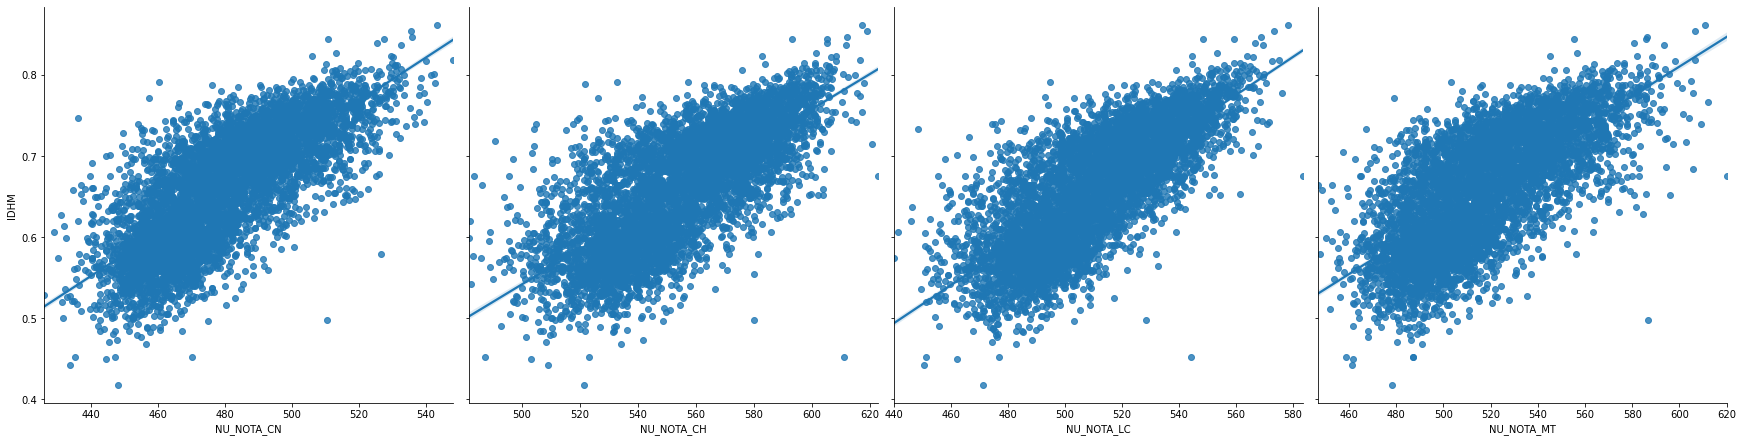

In [ ]:
notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']

sns.pairplot(dados_enem_IDHM_szero, y_vars='IDHM', x_vars=notas, height=6, kind='reg')

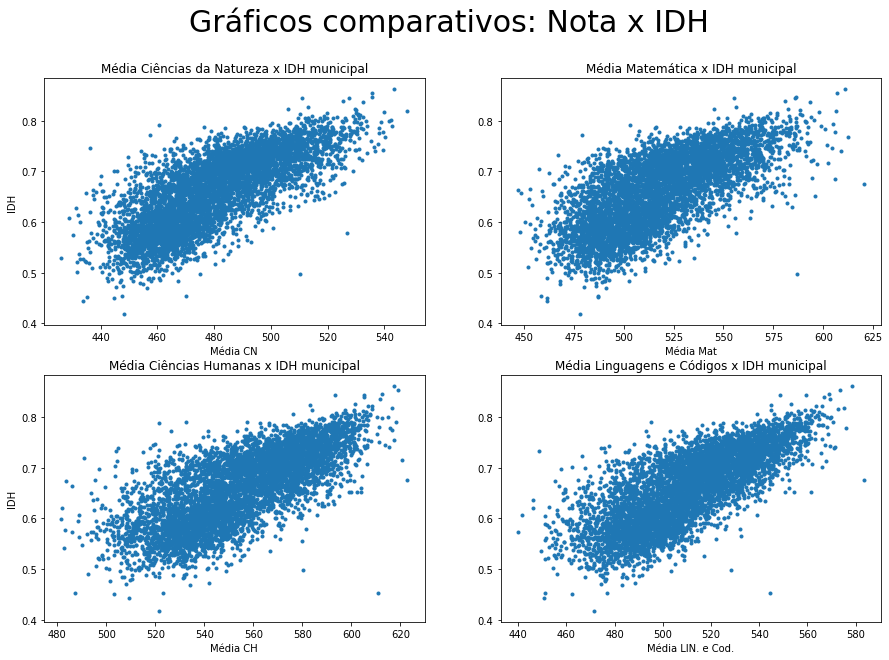

In [ ]:
fig1, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
fig1.suptitle('Gráficos comparativos: Nota x IDH',size=30)

y1 = dados_enem_IDHM_szero['IDHM']
x1 = dados_enem_IDHM_szero['NU_NOTA_CN']
x2 = dados_enem_IDHM_szero['NU_NOTA_MT']
x3 = dados_enem_IDHM_szero['NU_NOTA_CH']
x4 = dados_enem_IDHM_szero['NU_NOTA_LC']

axes[0, 0].plot(x1,y1,'.')
axes[0, 0].set_title('Média Ciências da Natureza x IDH municipal')
axes[0, 0].set_xlabel("Média CN")
axes[0, 0].set_ylabel("IDH")

axes[0, 1].plot(x2,y1,'.')
axes[0, 1].set_title('Média Matemática x IDH municipal')
axes[0, 1].set_xlabel("Média Mat")

axes[1, 0].plot(x3,y1,'.')
axes[1, 0].set_title('Média Ciências Humanas x IDH municipal')
axes[1, 0].set_xlabel("Média CH")
axes[1, 0].set_ylabel("IDH")

axes[1, 1].plot(x4,y1,'.')
axes[1, 1].set_title('Média Linguagens e Códigos x IDH municipal')
axes[1, 1].set_xlabel("Média LIN. e Cod.")


plt.show()

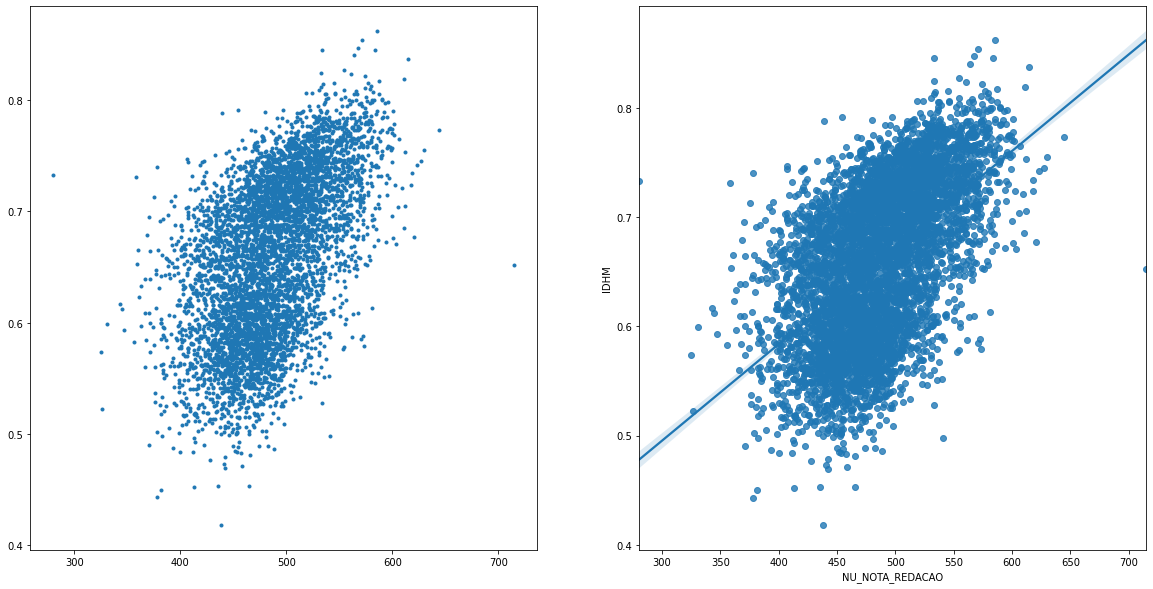

<Figure size 1152x720 with 0 Axes>

In [ ]:
fig2, axes2 = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

y = dados_enem_IDHM_szero['IDHM']
x = dados_enem_IDHM_szero['NU_NOTA_REDACAO']

sns.regplot(x="NU_NOTA_REDACAO", y="IDHM", data=dados_enem_IDHM_szero)

axes2[0].plot(x,y,'.')
plt.figure(figsize=(16,10))

plt.show()

### **Melhorando a visualização:**
O gráfico de dispersão, embora dê pra ver uma tendência linear sutil (quanto maior IDHM, maior a nota) existe uma maneira melhor de visualizar isso. Uma maneira que talvez melhore a visualização é separá-los em quadrantes a partir da médias gerais de IDH e das médias das notas dos municípios 

In [ ]:
media_das_medias_REDACAO = dados_enem_IDHM['NU_NOTA_REDACAO'].mean()
media_IDHM = dados_enem_IDHM['IDHM'].mean()


In [ ]:
IDH_municipio = dados_enem_IDHM['IDHM']
Nota_red_municipio = dados_enem_IDHM['NU_NOTA_REDACAO']

quadrante1 = (IDH_municipio > media_IDHM) & (Nota_red_municipio > media_das_medias_REDACAO)
quadrante2 = (IDH_municipio > media_IDHM) & (Nota_red_municipio < media_das_medias_REDACAO)
quadrante3 = (IDH_municipio < media_IDHM) & (Nota_red_municipio < media_das_medias_REDACAO)
quadrante4 = (IDH_municipio < media_IDHM) & (Nota_red_municipio > media_das_medias_REDACAO)

#Mascaramento booleano
dados_enem_q1 = dados_enem_IDHM[quadrante1]
dados_enem_q2 = dados_enem_IDHM[quadrante2]
dados_enem_q3 = dados_enem_IDHM[quadrante3]
dados_enem_q4 = dados_enem_IDHM[quadrante4]

1º Quadrante: IDHM alto e média alta 35.8%
2º Quadrante: IDHM alto e média baixa 16.68%
3º Quadrante: IDHM baixo e média baixa 34.67%
4º Quadrante: IDHM baixo e média alta 12.76%


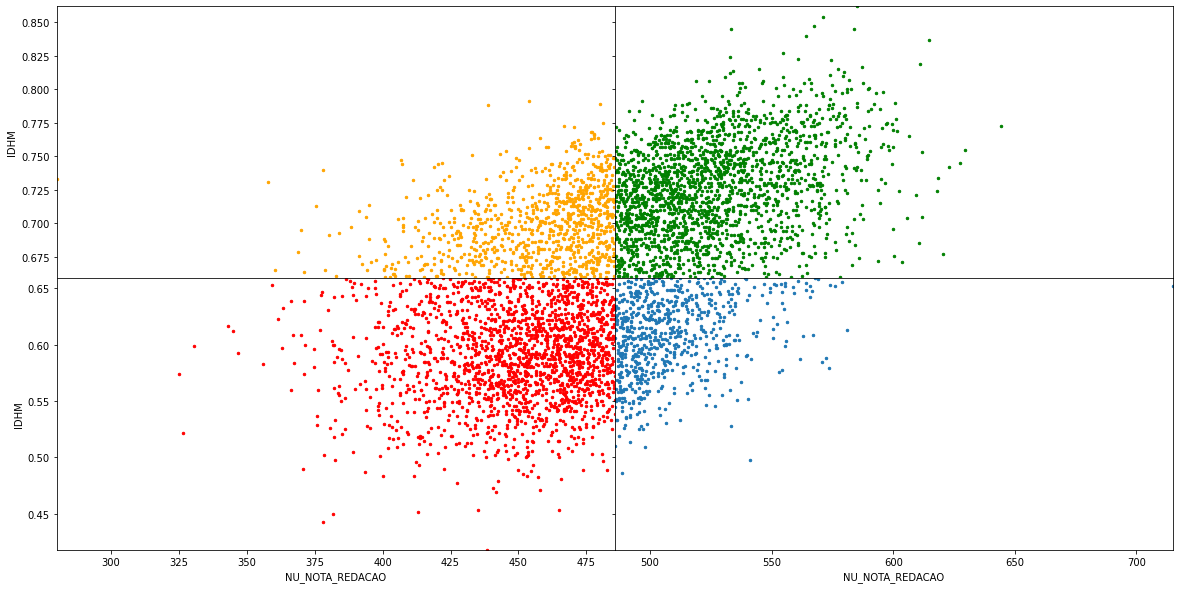

In [ ]:
fig3, axes3 = plt.subplots(2, 2, figsize=(20,10), sharex='col', sharey='row')
plt.subplots_adjust(wspace=0, hspace=0)

min_REDACAO = dados_enem_IDHM['NU_NOTA_REDACAO'].min()
max_REDACAO = dados_enem_IDHM['NU_NOTA_REDACAO'].max()
min_IDHM = dados_enem_IDHM['IDHM'].min()
max_IDHM = dados_enem_IDHM['IDHM'].max()

dados_enem_q1.plot.scatter('NU_NOTA_REDACAO', 'IDHM', s=6, ax=axes3[0,1],
                           xlim=(media_das_medias_REDACAO, max_REDACAO),
                           ylim=(media_IDHM, max_IDHM), color='green')
print(f"1º Quadrante: IDHM alto e média alta {round(100 * (len(dados_enem_q1) / len(IDH_municipio)), 2)}%")

dados_enem_q2.plot.scatter('NU_NOTA_REDACAO', 'IDHM', s=6, ax = axes3[0,0],
                           xlim=(min_REDACAO, media_das_medias_REDACAO),
                           ylim=(media_IDHM, max_IDHM), color='orange')
print(f"2º Quadrante: IDHM alto e média baixa {round(100 * (len(dados_enem_q2) / len(IDH_municipio)), 2)}%")

dados_enem_q3.plot.scatter('NU_NOTA_REDACAO', 'IDHM', s=6, ax = axes3[1,0],
                           xlim=(min_REDACAO, media_das_medias_REDACAO),
                           ylim=(min_IDHM, media_IDHM), color='red')
print(f"3º Quadrante: IDHM baixo e média baixa {round(100 * (len(dados_enem_q3) / len(IDH_municipio)), 2)}%")

dados_enem_q4.plot.scatter('NU_NOTA_REDACAO', 'IDHM', s=6, ax = axes3[1,1],
                           xlim=(media_das_medias_REDACAO, max_REDACAO),
                           ylim=(min_IDHM, media_IDHM))
print(f"4º Quadrante: IDHM baixo e média alta {round(100 * (len(dados_enem_q4) / len(IDH_municipio)), 2)}%")

plt.show()

### **Fazendo o mesmo para as notas de matemática:**

In [ ]:
#TODO fazer o mesmo para a nota de matemática

In [ ]:
media_das_medias_Mat = dados_enem_IDHM['NU_NOTA_MT'].mean()
Nota_mat_municipio = dados_enem_IDHM['NU_NOTA_MT']

quad1 = (IDH_municipio > media_IDHM) & (Nota_mat_municipio > media_das_medias_Mat)
quad2 = (IDH_municipio > media_IDHM) & (Nota_mat_municipio < media_das_medias_Mat)
quad3 = (IDH_municipio < media_IDHM) & (Nota_mat_municipio < media_das_medias_Mat)
quad4 = (IDH_municipio < media_IDHM) & (Nota_mat_municipio > media_das_medias_Mat)

#Mascaramento booleano
dados_enem_q1 = dados_enem_IDHM[quad1]
dados_enem_q2 = dados_enem_IDHM[quad2]
dados_enem_q3 = dados_enem_IDHM[quad3]
dados_enem_q4 = dados_enem_IDHM[quad4]

1º Quadrante: IDHM alto e média alta 38.08%
2º Quadrante: IDHM alto e média baixa 14.4%
3º Quadrante: IDHM baixo e média baixa 39.59%
4º Quadrante: IDHM baixo e média alta 7.85%


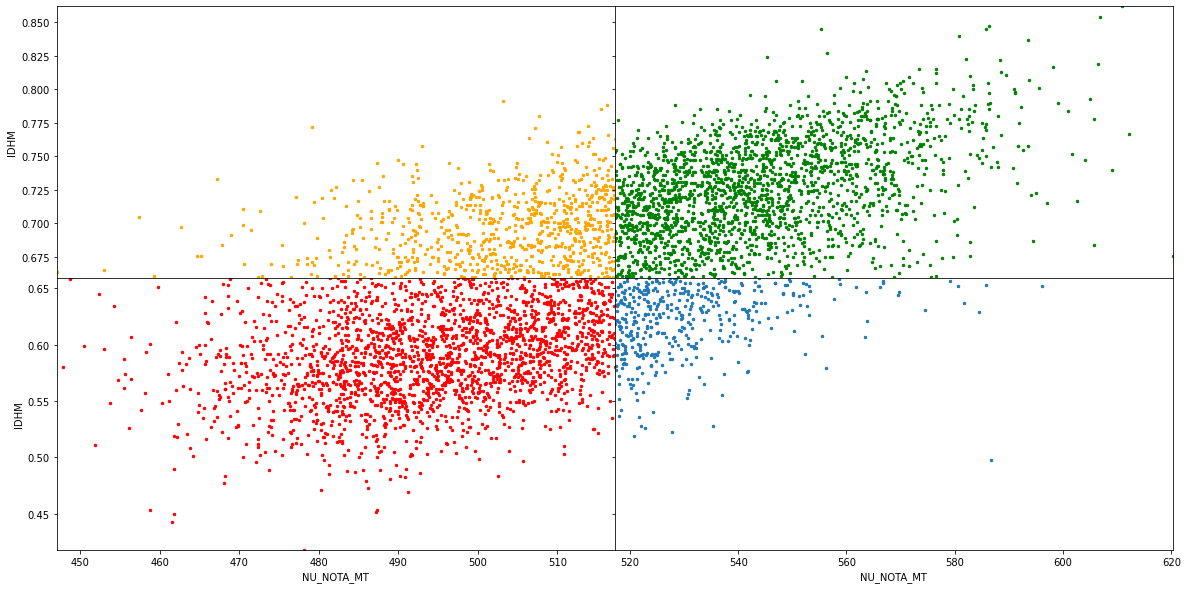

In [ ]:
fig4, axes4 = plt.subplots(2, 2, figsize=(20,10), sharex='col', sharey='row')
plt.subplots_adjust(wspace=0, hspace=0)

min_Mat = dados_enem_IDHM['NU_NOTA_MT'].min()
max_Mat = dados_enem_IDHM['NU_NOTA_MT'].max()
min_IDHM = dados_enem_IDHM['IDHM'].min()
max_IDHM = dados_enem_IDHM['IDHM'].max()

dados_enem_q1.plot.scatter('NU_NOTA_MT', 'IDHM', s=6, ax=axes4[0,1],
                           xlim=(media_das_medias_Mat, max_Mat),
                           ylim=(media_IDHM, max_IDHM), color='green')
print(f"1º Quadrante: IDHM alto e média alta {round(100 * (len(dados_enem_q1) / len(IDH_municipio)), 2)}%")

dados_enem_q2.plot.scatter('NU_NOTA_MT', 'IDHM', s=6, ax = axes4[0,0],
                           xlim=(min_Mat, media_das_medias_Mat),
                           ylim=(media_IDHM, max_IDHM), color='orange')
print(f"2º Quadrante: IDHM alto e média baixa {round(100 * (len(dados_enem_q2) / len(IDH_municipio)), 2)}%")

dados_enem_q3.plot.scatter('NU_NOTA_MT', 'IDHM', s=6, ax = axes4[1,0],
                           xlim=(min_Mat, media_das_medias_Mat),
                           ylim=(min_IDHM, media_IDHM), color='red')
print(f"3º Quadrante: IDHM baixo e média baixa {round(100 * (len(dados_enem_q3) / len(IDH_municipio)), 2)}%")

dados_enem_q4.plot.scatter('NU_NOTA_MT', 'IDHM', s=6, ax = axes4[1,1],
                           xlim=(media_das_medias_Mat, max_Mat),
                           ylim=(min_IDHM, media_IDHM))
print(f"4º Quadrante: IDHM baixo e média alta {round(100 * (len(dados_enem_q4) / len(IDH_municipio)), 2)}%")

plt.show()

## **Gráfico mapa**

Visualizar a distribuição dos dados pelo Território Brasileiro

In [ ]:
municipios_loc = pd.read_csv('drive/My Drive/Colab Notebooks/Datasets/ENEM/Municipios_Brasileiros.csv')
municipios_loc

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31
2,5200100,Abadiânia,-16.19700,-48.7057,0,52
3,3100203,Abaeté,-19.15510,-45.4444,0,31
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15
...,...,...,...,...,...,...
5565,2933604,Xique-Xique,-10.82300,-42.7245,0,29
5566,2517407,Zabelê,-8.07901,-37.1057,0,25
5567,3557154,Zacarias,-21.05060,-50.0552,0,35
5568,2114007,Zé Doca,-3.27014,-45.6553,0,21


In [ ]:
enem_IDHM_municipios_loc = pd.merge(dados_enem_IDHM, municipios_loc, how='left',
                                    left_on=['CO_MUNICIPIO_RESIDENCIA'],
                                    right_on=['codigo_ibge'])
enem_IDHM_municipios_loc

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,ANO,UF,Codmun6,Codmun7,Município,IDHM,IDHM_E,IDHM_L,IDHM_R,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
0,1100015,Alta Floresta D'Oeste,11,RO,480.653,557.423,505.436,519.142,466.070,2010.0,11.0,110001.0,1100015.0,ALTA FLORESTA D'OESTE,0.641,0.526,0.763,0.657,1100015,Alta Floresta D'Oeste,-11.92830,-61.9953,0,11
1,1100023,Ariquemes,11,RO,476.208,553.069,510.741,508.155,458.495,2010.0,11.0,110002.0,1100023.0,ARIQUEMES,0.702,0.600,0.806,0.716,1100023,Ariquemes,-9.90571,-63.0325,0,11
2,1100031,Cabixi,11,RO,468.974,551.688,499.123,505.800,446.769,2010.0,11.0,110003.0,1100031.0,CABIXI,0.650,0.559,0.757,0.650,1100031,Cabixi,-13.49450,-60.5520,0,11
3,1100049,Cacoal,11,RO,484.516,562.595,521.349,522.346,478.411,2010.0,11.0,110004.0,1100049.0,CACOAL,0.718,0.620,0.821,0.727,1100049,Cacoal,-11.43430,-61.4562,0,11
4,1100056,Cerejeiras,11,RO,477.078,557.302,513.361,507.730,464.396,2010.0,11.0,110005.0,1100056.0,CEREJEIRAS,0.692,0.602,0.799,0.688,1100056,Cerejeiras,-13.18700,-60.8168,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5222005,Vianópolis,52,GO,493.409,556.502,518.796,525.894,486.983,2010.0,52.0,522200.0,5222005.0,VIANÓPOLIS,0.712,0.622,0.818,0.710,5222005,Vianópolis,-16.74050,-48.5159,0,52
5566,5222054,Vicentinópolis,52,GO,469.161,532.044,491.771,506.643,450.000,2010.0,52.0,522205.0,5222054.0,VICENTINÓPOLIS,0.684,0.562,0.804,0.707,5222054,Vicentinópolis,-17.73220,-49.8047,0,52
5567,5222203,Vila Boa,52,GO,459.281,524.828,474.697,494.638,377.500,2010.0,52.0,522220.0,5222203.0,VILA BOA,0.647,0.534,0.818,0.619,5222203,Vila Boa,-15.03870,-47.0520,0,52
5568,5222302,Vila Propício,52,GO,455.735,515.670,473.967,476.962,402.245,2010.0,52.0,522230.0,5222302.0,VILA PROPÍCIO,0.634,0.505,0.802,0.629,5222302,Vila Propício,-15.45420,-48.8819,0,52


## **Distribuição das notas do ENEM 2018**

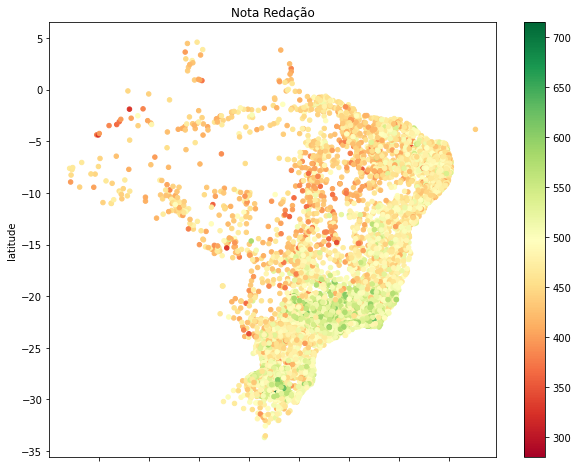

In [ ]:
enem_IDHM_municipios_loc.plot.scatter(x='longitude', y='latitude', figsize=(10,8),
                                      c=enem_IDHM_municipios_loc['NU_NOTA_REDACAO'],
                                      cmap='RdYlGn', title="Nota Redação")
plt.show()

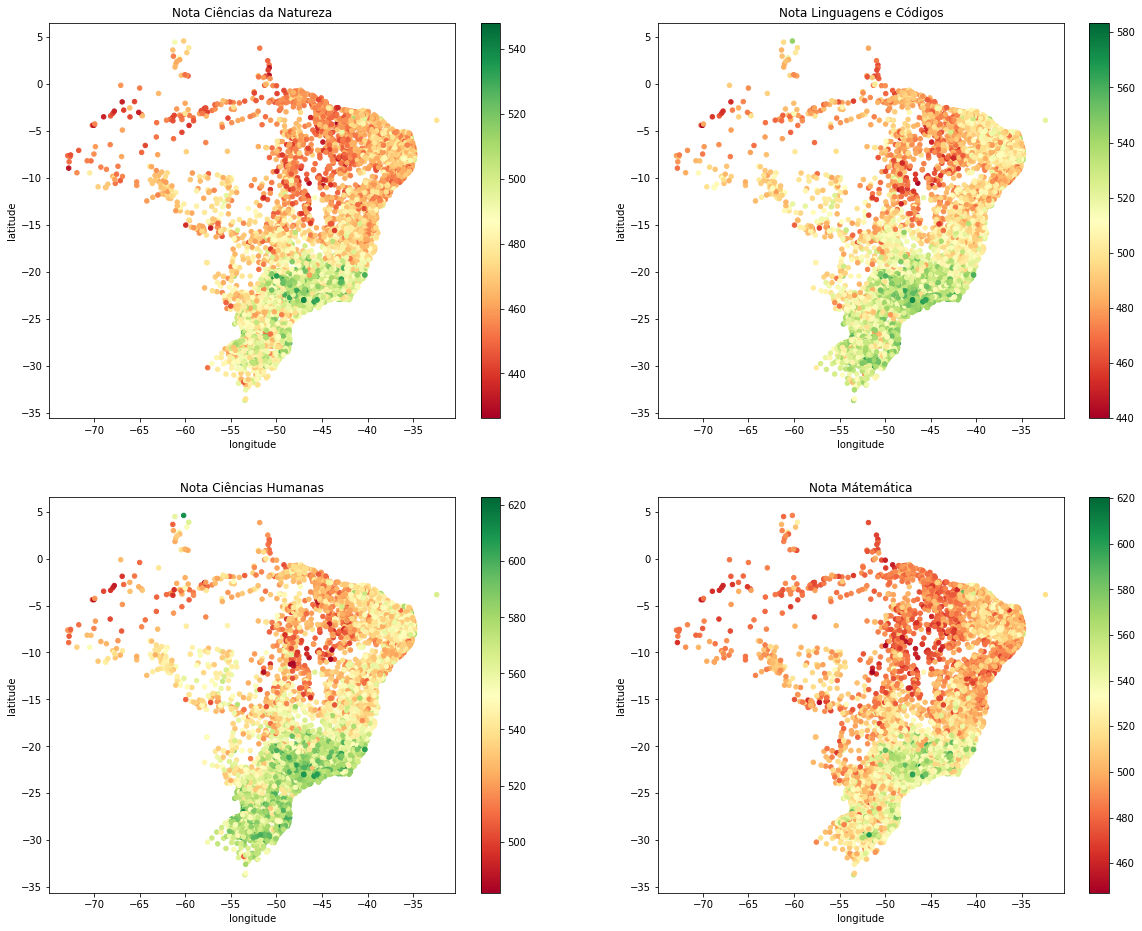

In [ ]:
fig5, axes5 = plt.subplots(2,2, figsize=(20,16))

enem_IDHM_municipios_loc.plot.scatter(x='longitude', y='latitude',
                                      c=enem_IDHM_municipios_loc['NU_NOTA_CN'],
                                      cmap='RdYlGn', title="Nota Ciências da Natureza",
                                      ax=axes5[0,0])

enem_IDHM_municipios_loc.plot.scatter(x='longitude', y='latitude',
                                      c=enem_IDHM_municipios_loc['NU_NOTA_CH'],
                                      cmap='RdYlGn', title="Nota Ciências Humanas",
                                      ax=axes5[1,0])

enem_IDHM_municipios_loc.plot.scatter(x='longitude', y='latitude',
                                      c=enem_IDHM_municipios_loc['NU_NOTA_LC'],
                                      cmap='RdYlGn', title="Nota Linguagens e Códigos",
                                      ax=axes5[0,1])

enem_IDHM_municipios_loc.plot.scatter(x='longitude', y='latitude',
                                      c=enem_IDHM_municipios_loc['NU_NOTA_MT'],
                                      cmap='RdYlGn', title="Nota Mátemática",
                                      ax=axes5[1,1])

plt.show()

## **Distribuição do IDHs**

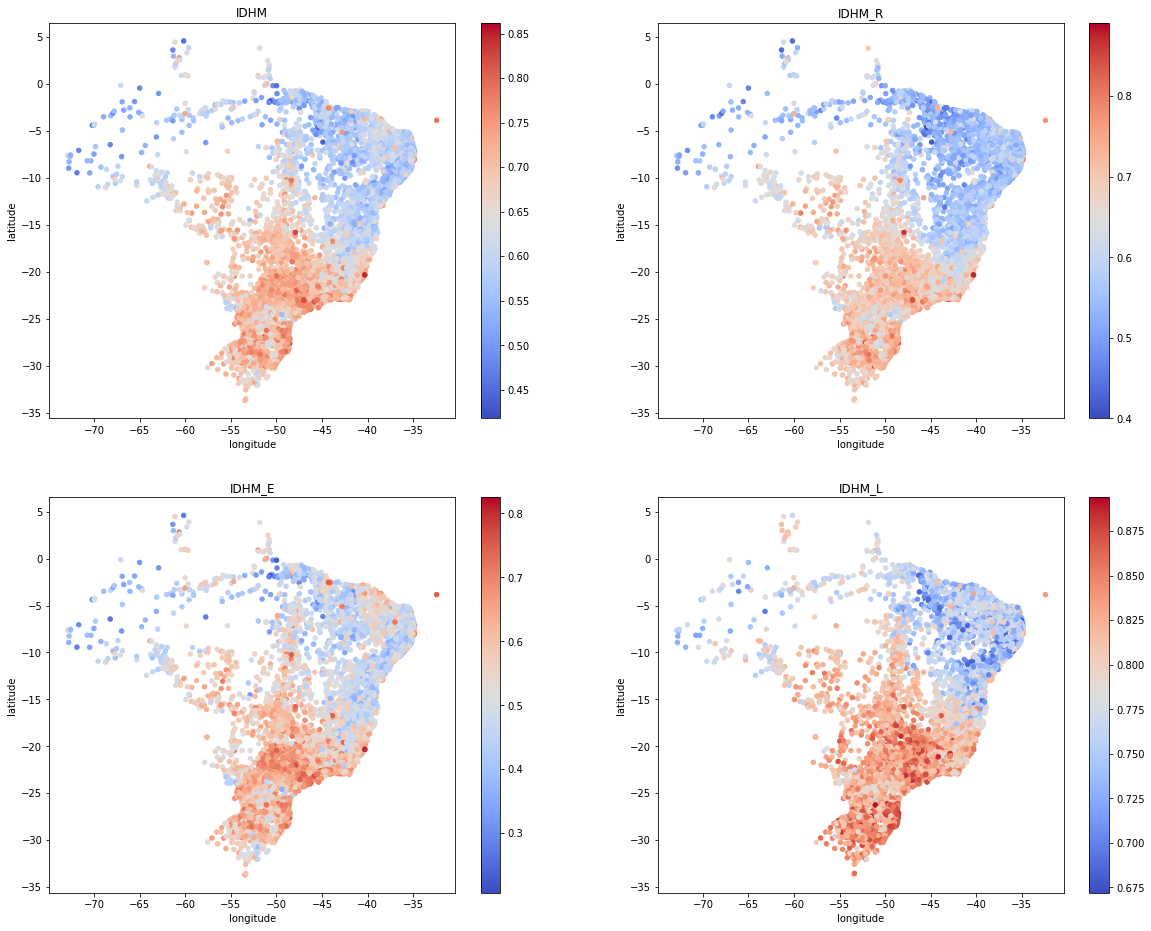

In [ ]:
fig6, axes6 = plt.subplots(2,2, figsize=(20,16))

enem_IDHM_municipios_loc.plot.scatter(x='longitude', y='latitude',
                                      c=enem_IDHM_municipios_loc['IDHM'],
                                      cmap='coolwarm', title="IDHM",
                                      ax=axes6[0,0])

enem_IDHM_municipios_loc.plot.scatter(x='longitude', y='latitude',
                                      c=enem_IDHM_municipios_loc['IDHM_E'],
                                      cmap='coolwarm', title="IDHM_E",
                                      ax=axes6[1,0])

enem_IDHM_municipios_loc.plot.scatter(x='longitude', y='latitude',
                                      c=enem_IDHM_municipios_loc['IDHM_R'],
                                      cmap='coolwarm', title="IDHM_R",
                                      ax=axes6[0,1])

enem_IDHM_municipios_loc.plot.scatter(x='longitude', y='latitude',
                                      c=enem_IDHM_municipios_loc['IDHM_L'],
                                      cmap='coolwarm', title="IDHM_L",
                                      ax=axes6[1,1])

plt.show()